In [3]:
from seagul.rl.run_utils import load_model
import pandas as pd
import os
import numpy as np
from seagul.plot import smooth_bounded_curve
import matplotlib.pyplot as plt
import gym

Logging to /tmp/openai-2020-05-07-22-25-45-937966


/home/sgillen/work/seagul/seagul/envs/__init__.py:51: UserWarning: Warning, pybullet envs not installed
  warnings.warn("Warning, pybullet envs not installed")


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f176f6515f8>)

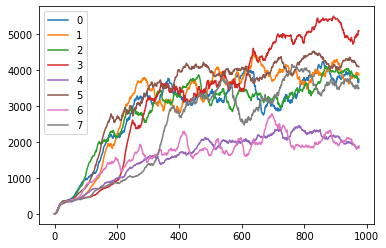

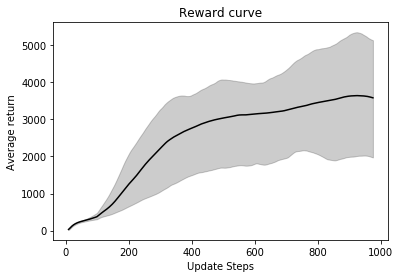

In [4]:
path_list = []
df_list = []
min_length = float('inf')
trial_path = "/home/sgillen/work/lorenz/run_bs/data_bs/0"

for entry in os.scandir(trial_path):
    try:
        df = pd.read_csv(entry.path + "/progress.csv")
        plt.plot(df['eprewmean'])


        if len(df['eprewmean']) < min_length:
            min_length = len(df['eprewmean'])

        df_list.append(df)
        path_list.append(entry.path)
    except:
        pass

min_length = int(min_length)
rewards = np.zeros((min_length, len(df_list)))

for i, df in enumerate(df_list):
   rewards[:, i] = np.array(df['eprewmean'][:min_length])

plt.legend(['0','1','2','3','4','5','6', '7'])
smooth_bounded_curve(rewards[:min_length],window=10)



In [6]:
try:
    model = load_model(path_list[3])
except:
    pass

done = False
env = gym.make("Walker2d-v2")

obs = env.reset()

#rew_list.append(True) 

while not done:
    act,_,_,_ = model.step(obs)
    obs,rew,done,_ = env.step(act)
    env.render()
    


Logging to /tmp/openai-2020-05-07-22-25-59-355797
env_type: mujoco
Training ppo2 on mujoco:Walker2d-v2 with arguments 
{'nsteps': 2048, 'nminibatches': 32, 'lam': 0.95, 'gamma': 0.99, 'noptepochs': 10, 'log_interval': 1, 'ent_coef': 0.0, 'lr': <function mujoco.<locals>.<lambda> at 0x7f1745e36510>, 'cliprange': 0.2, 'value_network': 'copy', 'load_path': '/home/sgillen/work/lorenz/run_bs/data_bs/0/15_44619/saved_model', 'network': 'mlp'}
Creating window glfw


In [17]:
len(env.s)

array([ 7.84958993e-01, -8.84444520e-01, -4.98184033e-03,  8.50153172e-02,
       -1.01888165e-01,  4.93455617e-02, -2.37935752e-02, -3.54296532e-01,
       -2.48859398e+00, -2.20166936e+00, -3.45380124e+00, -6.97604790e-01,
       -5.85007713e-01, -7.14893528e+00, -1.01337141e+00,  4.35536681e-02,
        1.92673433e+00])

In [13]:
d = env.env.sim.data

In [16]:
d.__dir__()

['__new__',
 'get_body_xpos',
 'get_xpos',
 'get_body_xquat',
 'get_xquat',
 'get_body_xmat',
 'get_xmat',
 'get_body_xipos',
 'get_xipos',
 'get_body_ximat',
 'get_ximat',
 'get_body_jacp',
 'get_body_jacr',
 'get_body_xvelp',
 'get_body_xvelr',
 'get_joint_xanchor',
 'get_xanchor',
 'get_joint_xaxis',
 'get_xaxis',
 'get_geom_xpos',
 'get_geom_xmat',
 'get_geom_jacp',
 'get_geom_jacr',
 'get_geom_xvelp',
 'get_geom_xvelr',
 'get_site_xpos',
 'get_site_xmat',
 'get_site_jacp',
 'get_site_jacr',
 'get_site_xvelp',
 'get_site_xvelr',
 'get_camera_xpos',
 'get_cam_xpos',
 'get_camera_xmat',
 'get_cam_xmat',
 'get_light_xpos',
 'get_light_xdir',
 'get_sensor',
 'get_sensordata',
 'get_mocap_pos',
 'set_mocap_pos',
 'get_mocap_quat',
 'set_mocap_quat',
 'get_joint_qpos',
 'set_joint_qpos',
 'get_joint_qvel',
 'set_joint_qvel',
 'body_xpos',
 'body_xquat',
 'body_xmat',
 'active_contacts_efc_pos',
 'nstack',
 'nbuffer',
 'pstack',
 'maxuse_stack',
 'maxuse_con',
 'maxuse_efc',
 'solver_iter